In [30]:
import numpy as np
import pandas as pd
from collections import Counter
import operator
import copy
import random
from sklearn import model_selection
from sparse_bag_tools import bag_of_games, leave_n_in, get_metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.mlab as mlab
%matplotlib inline
raw_games = pd.read_csv("steam-200k.csv", names =["user_id", "game", "behavior", "value", "misc."])
playtime = raw_games[raw_games["behavior"] == "play" ]

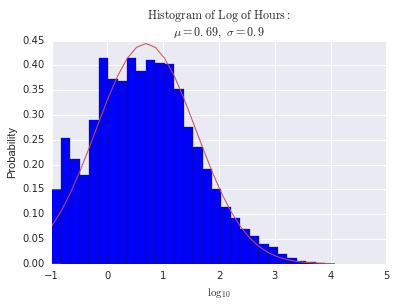

In [45]:
n, bins, patches = plt.hist(np.log10(playtime["value"]) , bins = 30, normed = True, color='blue')
mu = np.log10( playtime["value"]).mean()
sigma = np.log10( playtime["value"]).std()
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r-', linewidth=1)

plt.xlabel(r'$\log_{10}$')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Log\ of\ Hours:}$' + "\n" '$\mu=%s,\ \sigma=%s$' %
          (np.round(mu, 2), np.round(sigma, 2)))
plt.grid(True)

plt.savefig("hours_hist.jpg")

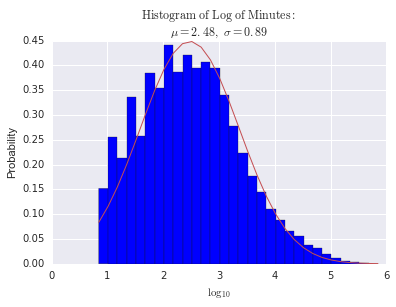

In [46]:
n, bins, patches = plt.hist(np.log10(1 + playtime["value"]*60) , bins = 30, normed = True, color='blue')
mu = np.log10(1 + playtime["value"]*60).mean()
sigma = np.log10(1 + playtime["value"]*60).std()
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r-', linewidth=1)

plt.xlabel(r'$\log_{10}$')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Log\ of\ Minutes:}$' + "\n" '$\mu=%s,\ \sigma=%s$' %
          (np.round(mu, 2), np.round(sigma, 2)))
plt.grid(True)

plt.savefig("minutes_hist.jpg")

In [25]:
bins

array([-1.        , -0.83099381, -0.66198762, -0.49298143, -0.32397524,
       -0.15496905,  0.01403714,  0.18304333,  0.35204952,  0.52105571,
        0.6900619 ,  0.85906809,  1.02807427,  1.19708046,  1.36608665,
        1.53509284,  1.70409903,  1.87310522,  2.04211141,  2.2111176 ,
        2.38012379,  2.54912998,  2.71813617,  2.88714236,  3.05614855,
        3.22515474,  3.39416093,  3.56316712,  3.73217331,  3.9011795 ,
        4.07018569])

In [40]:
(((y[1:]-n)**2).mean()**0.5)

0.032925586627488436

In [41]:
min(playtime["value"]), max(playtime["value"])

(0.10000000000000001, 11754.0)